# Data NutA

Dataset harus disiapkan terlebih dahulu, buat csv biasa aja, ubah , menjadi . Lalu hapus sebagai delimiter nanti cukup gunakan , saja

In [1]:
import os
import pandas as pd

df = pd.read_csv('nuta_Eksponensial.csv', delimiter=',')
df

,index,Volume Tandon (L),Waktu (s),Delta TDS (ppm)
0,0,40,0,4.150000
1,1,40,1,4.655878
2,2,40,2,8.737345
3,3,40,3,12.173727
4,4,40,4,13.735036
...,...,...,...,...
416,55,100,56,127.198415
417,56,100,57,130.111451
418,57,100,58,132.330896
419,58,100,59,135.175556


Untuk dataset final, hapus bagian rata rata delta ph, phawal dan phakhir

In [2]:
dataset = df[["Volume Tandon (L)", "Waktu (s)", "Delta TDS (ppm)"]]
dataset

,Volume Tandon (L),Waktu (s),Delta TDS (ppm)
0,40,0,4.150000
1,40,1,4.655878
2,40,2,8.737345
3,40,3,12.173727
4,40,4,13.735036
...,...,...,...
416,100,56,127.198415
417,100,57,130.111451
418,100,58,132.330896
419,100,59,135.175556


In [3]:
average= dataset.groupby(["Volume Tandon (L)", "Waktu (s)"]).mean()[["Delta TDS (ppm)"]]
# deltaph = average.DeltapH
average

Delta TDS (ppm)
Volume Tandon (L) Waktu (s)                 
40                0                 4.150000
                  1                 4.655878
                  2                 8.737345
                  3                12.173727
                  4                13.735036
...                                      ...
100               56              127.198415
                  57              130.111451
                  58              132.330896
                  59              135.175556
                  60              137.511380

[421 rows x 1 columns]

In [4]:
agregate = dataset.groupby(["Volume Tandon (L)", "Waktu (s)"]).mean()[["Delta TDS (ppm)"]]
# deltaph = average.DeltapH
agregate

Delta TDS (ppm)
Volume Tandon (L) Waktu (s)                 
40                0                 4.150000
                  1                 4.655878
                  2                 8.737345
                  3                12.173727
                  4                13.735036
...                                      ...
100               56              127.198415
                  57              130.111451
                  58              132.330896
                  59              135.175556
                  60              137.511380

[421 rows x 1 columns]

Nantinya data diaverage dan jadilah dataset yang baik

In [5]:
nuta = average.reset_index()
nuta

,Volume Tandon (L),Waktu (s),Delta TDS (ppm)
0,40,0,4.150000
1,40,1,4.655878
2,40,2,8.737345
3,40,3,12.173727
4,40,4,13.735036
...,...,...,...
416,100,56,127.198415
417,100,57,130.111451
418,100,58,132.330896
419,100,59,135.175556


<Axes: >

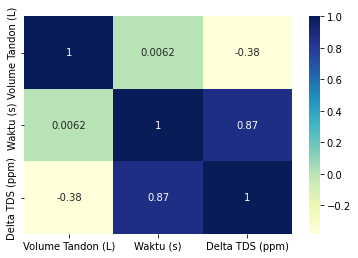

In [6]:
import seaborn as sb
sb.heatmap(nuta.corr(), cmap="YlGnBu", annot=True)

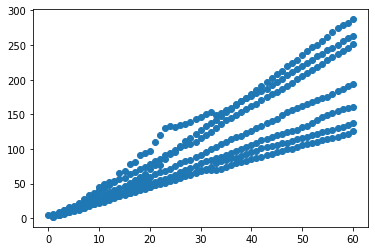

In [7]:
from matplotlib import pyplot

pyplot.scatter(nuta.iloc[:,1],nuta.iloc[:,2])

# Prediksi Nutrisi A sesudai dengan waktu dengan LinearRegression

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Membuat dataframe
df = nuta

# Fitur (Volume dan Waktu) dan Target (DeltapH)
X = df[["Volume Tandon (L)", "Waktu (s)"]]
y = df["Delta TDS (ppm)"]

# Membuat model regresi linear
model = LinearRegression()
model.fit(X, y)

# Membuat prediksi untuk waktu dari 1 hingga 10 detik dengan berbagai volume
prediksi = []
for volume in [40, 50, 60, 70, 80, 90, 100]:
    for waktu in range(1, 101):
        prediksi_deltatds = model.predict([[volume, waktu]])[0]
        prediksi.append({"Volume Tandon (L)": volume, "Waktu (s)": waktu, 'Prediksi ΔTDS': round(prediksi_deltatds, 2)})

# Menyusun hasil prediksi dalam bentuk tabel
tabel_prediksi = pd.DataFrame(prediksi)

# Menampilkan tabel prediksi
print(tabel_prediksi)


# Filter data untuk volume tertentu saja
filter_tabel_volume = tabel_prediksi[tabel_prediksi["Waktu (s)"] == 61]

# Menampilkan tabel hasil filter
print(filter_tabel_volume)


     Volume Tandon (L)  Waktu (s)  Prediksi ΔTDS
0                   40          1          38.99
1                   40          2          42.42
2                   40          3          45.86
3                   40          4          49.29
4                   40          5          52.72
..                 ...        ...            ...
695                100         96         286.08
696                100         97         289.52
697                100         98         292.95
698                100         99         296.38
699                100        100         299.81

[700 rows x 3 columns]
     Volume Tandon (L)  Waktu (s)  Prediksi ΔTDS
60                  40         61         244.93
160                 50         61         231.76
260                 60         61         218.60
360                 70         61         205.44
460                 80         61         192.28
560                 90         61         179.12
660                100         61         165

# Linear Regression

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Membuat dataframe
df = nuta

# Fitur (Volume dan DeltapH) dan Target (Waktu)
X = df[["Volume Tandon (L)", "Waktu (s)"]]
y = df["Delta TDS (ppm)"]

# Membuat model regresi linear
model = LinearRegression()
model.fit(X, y)

# Membuat prediksi untuk DeltapH dari 0.05 hingga 0.6 dengan berbagai volume
prediksi = []
for volume in [40, 50, 60, 70, 80, 90, 100]:
    for deltaph in np.arange(0.05, 2, 0.05):
        prediksi_waktu = model.predict([[volume, deltaph]])[0]
        prediksi.append({"Volume Tandon (L)": volume, 'ΔpH': round(deltaph, 2), 'Prediksi Waktu (detik)': round(prediksi_waktu, 2)})

# Menyusun hasil prediksi dalam bentuk tabel
tabel_prediksi = pd.DataFrame(prediksi)

# Menampilkan tabel prediksi
print(tabel_prediksi)


# Filter data untuk volume tertentu saja
tabel_predik = tabel_prediksi[tabel_prediksi["Volume Tandon (L)"] == 70]

# Menampilkan tabel hasil filter
print(tabel_predik)

     Volume Tandon (L)   ΔpH  Prediksi Waktu (detik)
0                   40  0.05                   35.73
1                   40  0.10                   35.90
2                   40  0.15                   36.07
3                   40  0.20                   36.24
4                   40  0.25                   36.42
..                 ...   ...                     ...
268                100  1.75                  -37.41
269                100  1.80                  -37.24
270                100  1.85                  -37.06
271                100  1.90                  -36.89
272                100  1.95                  -36.72

[273 rows x 3 columns]
     Volume Tandon (L)   ΔpH  Prediksi Waktu (detik)
117                 70  0.05                   -3.76
118                 70  0.10                   -3.58
119                 70  0.15                   -3.41
120                 70  0.20                   -3.24
121                 70  0.25                   -3.07
122                 70

# Split Data

In [10]:
from sklearn.model_selection import train_test_split

# Fitur (Volume dan DeltapH) dan Target (Waktu)
X = df[["Volume Tandon (L)", "Delta TDS (ppm)"]]
y = df["Waktu (s)"]

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=42)
print("Banyaknya data training: ", y_train.shape)
print("Banyaknya data test: ", y_test.shape)

Banyaknya data training:  (294,)
Banyaknya data test:  (127,)


# LinearRegression

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi dengan data test
y_pred = model.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", model.coef_[0])
print("Koefisien Delta: ", model.coef_[1])
print("Intercept:", model.intercept_)
print("\n")

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print("\n")

volume = 70
nut_awal = 180
nut_target = 400
deltanut = nut_target - nut_awal

x1 = volume
x2 = deltanut

a = model.coef_[0]
b = model.coef_[1]
c = model.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = model.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)


Koefisien Volume:  0.343604494015843
Koefisien Delta:  0.2587784289864268
Intercept: -19.784431311044955


Evaluasi Model:
Mean Squared Error (MSE): 30.94039370822248
Root Mean Squared Error (RMSE): 5.562408984264145
Mean Absolute Error (MAE): 4.221329780386452
R-squared: 0.8948024500707826


Manual:  61.19913764707795
Model 61.19913764707795
Selisih 0.0


# Ridge Regression

In [15]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Membuat model
rdg = Ridge(alpha = 0.1)
rdg.fit(X_train, y_train)

# Melakukan prediksi dengan data test
y_pred = rdg.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", rdg.coef_[0])
print("Koefisien Delta: ", rdg.coef_[1])
print("Intercept: ",rdg.intercept_)
print("\n")

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print("\n")

volume = 70
nut_awal = 180
nut_target = 400
deltanut = nut_target - nut_awal

x1 = volume
x2 = deltanut
a = rdg.coef_[0]
b = rdg.coef_[1]
c = rdg.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = rdg.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.34360407394851294
Koefisien Delta:  0.2587783630379962
Intercept:  -19.78439501255334


Evaluasi Model:
Mean Squared Error (MSE): 30.940391265238343
Root Mean Squared Error (RMSE): 5.562408764666468
Mean Absolute Error (MAE): 4.22132872520887
R-squared: 0.8948024583769454


Manual:  61.199130032201715
Model 61.19913003220173
Selisih -1.4210854715202004e-14


## Ridge Regression With CV

In [16]:
from sklearn.linear_model import RidgeCV

# Membuat model
rdg_cv = RidgeCV([.1,.3,.5,.7,.9,1,10],cv=5)
rdg_cv.fit(X_train,y_train)

# Melakukan prediksi dengan data test
y_pred = rdg_cv.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ",rdg_cv.coef_[0])
print("Koefisien Delta: ",rdg_cv.coef_[1])
print("Intercept: ", rdg_cv.intercept_)
print("\n")

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print("\n")

volume = 70
nut_awal = 180
nut_target = 400
deltanut = nut_target - nut_awal

x1 = volume
x2 = deltanut

a = rdg_cv.coef_[0]
b = rdg_cv.coef_[1]
c = rdg_cv.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = rdg_cv.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.3435624920489533
Koefisien Delta:  0.2587718347312882
Intercept:  -19.78080185748992


Evaluasi Model:
Mean Squared Error (MSE): 30.940150226739398
Root Mean Squared Error (RMSE): 5.562387097886967
Mean Absolute Error (MAE): 4.221224273609592
R-squared: 0.894803277909488


Manual:  61.1983762268202
Model 61.1983762268202
Selisih 0.0


# Lasso

In [17]:
from sklearn.linear_model import Lasso

# Membuat model
lss = Lasso(alpha=0.2)
lss.fit(X_train,y_train)

# Melakukan prediksi dengan data test
y_pred = lss.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", lss.coef_[0])
print("Koefisien Delta: ", lss.coef_[1])
print("Intercept: ", lss.intercept_)
print("\n")

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print("\n")

# Testing
volume = 70
nut_awal = 180
nut_target = 400
deltanut = nut_target - nut_awal

x1 = volume
x2 = deltanut

a = lss.coef_[0]
b = lss.coef_[1]
c = lss.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = lss.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.3428653335433897
Koefisien Delta:  0.2586530693521585
Intercept:  -19.71961614870426


Evaluasi Model:
Mean Squared Error (MSE): 30.93641228695989
Root Mean Squared Error (RMSE): 5.562051086331363
Mean Absolute Error (MAE): 4.219415506580771
R-squared: 0.8948159869302683


Manual:  61.18463245680789
Model 61.18463245680789
Selisih 0.0


# Lasso CV

In [18]:
from sklearn.linear_model import LassoCV

# Membuat model
lss_cv = LassoCV(alphas=[.1,.3,.5,.7,.9])
lss_cv.fit(X_train,y_train)

# Melakukan prediksi dengan data test
y_pred = lss_cv.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", lss_cv.coef_[0])
print("Koefisien Delta: ", lss_cv.coef_[1])
print("Intercept: ", lss_cv.intercept_)
print("\n")

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print("\n")

# Testing
volume = 70
nut_awal = 180
nut_target = 400
deltanut = nut_target - nut_awal

x1 = volume
x2 = deltanut

a = lss_cv.coef_[0]
b = lss_cv.coef_[1]
c = lss_cv.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = lss_cv.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.3424966161754848
Koefisien Delta:  0.25859048767188136
Intercept:  -19.68727934815594


Evaluasi Model:
Mean Squared Error (MSE): 30.934613491819537
Root Mean Squared Error (RMSE): 5.56188938147996
Mean Absolute Error (MAE): 4.218460306483773
R-squared: 0.8948221028460311


Manual:  61.1773910719419
Model 61.1773910719419
Selisih 0.0


# ElasticNetCV

In [19]:
from sklearn.linear_model import ElasticNetCV

# Membuat model
eln_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1])
eln_cv.fit(X_train,y_train)

# Melakukan prediksi dengan data test
y_pred = eln_cv.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", eln_cv.coef_[0])
print("Koefisien DeltapH: ", eln_cv.coef_[1])
print("Intercept: ", eln_cv.intercept_)
print("\n")

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print("\n")

# Test
volume = 70
nut_awal = 180
nut_target = 400
deltanut = nut_target - nut_awal

x1 = volume
x2 = deltanut

a = eln_cv.coef_[0]
b = eln_cv.coef_[1]
c = eln_cv.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = eln_cv.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.33967920165821486
Koefisien DeltapH:  0.258112293396603
Intercept:  -19.44018989906227


Evaluasi Model:
Mean Squared Error (MSE): 30.92497621377644
Root Mean Squared Error (RMSE): 5.561022946704719
Mean Absolute Error (MAE): 4.2111615056828775
R-squared: 0.8948548696571998


Manual:  61.12205876426544
Model 61.12205876426544
Selisih 0.0


# GridSearchCV

In [232]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
params = {
    "max_depth": range(2,10),
    "min_samples_split": range(2,10),
    "min_samples_leaf": range(2,10)
}

dtr = DecisionTreeRegressor()
gs = GridSearchCV(dtr,params)

gs.fit(X_train,y_train)

y_pred_train = gs.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))

0.6428020258558963


# SVR

In [20]:
from sklearn.svm import SVR

# Membuat model
svr = SVR(kernel="linear")
svr.fit(X_train,y_train)

# Melakukan prediksi dengan data test
y_pred = svr.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", svr.coef_[0][0])
print("Koefisien DeltapH: ", svr.coef_[0][1])
print("Intercept: ", svr.intercept_[0])
print("\n")

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print("\n")

# Test
volume = 70
nut_awal = 180
nut_target = 400
deltanut = nut_target - nut_awal

x1 = volume
x2 = deltanut
a = svr.coef_[0][0]
b = svr.coef_[0][1]
c = svr.intercept_[0]

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = svr.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.32886107904764117
Koefisien DeltapH:  0.2564519459986059
Intercept:  -18.187585693190144


Evaluasi Model:
Mean Squared Error (MSE): 30.756663122708684
Root Mean Squared Error (RMSE): 5.545869014204057
Mean Absolute Error (MAE): 4.142141052432408
R-squared: 0.8954271353163997


Manual:  61.25211795983803
Model 61.25211795957604
Selisih 2.6199131752946414e-10


# program sebelumnya

In [90]:
# memisahkan variabel independen (x) dan dependen (y)
df = pd.DataFrame(ph)
X = ph[['Volume', 'Waktu']]
y = ph['DeltapH']

#membuat model regresi linear
model = LinearRegression()
model.fit(X, y)

# menampilkan koefisien dan intercept
print(f'Koefisien: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Koefisien: [-0.00430714  0.067     ]
Intercept: 0.3044999999999999


In [91]:
# testing prediksi
volume_test = 40
deltaph_test = 1

# Membuat prediksi dengna model
predicted_time = model.predict([[volume_test, deltaph_test]])
print(f'Predicted Waktu untuk Volume {volume_test} liter dan DeltapH {deltaph_test} adalah: {predicted_time[0]:.2f} detik')

Predicted Waktu untuk Volume 40 liter dan DeltapH 1 adalah: 0.20 detik


In [92]:
# Menampilkan seluruh data dengan prediksi
df['Predicted_Waktu'] = model.predict(X)
print(df)

    Volume  Waktu  DeltapH  Predicted_Waktu
0       40      1     0.13         0.199214
1       40      2     0.21         0.266214
2       40      3     0.32         0.333214
3       40      4     0.48         0.400214
4       40      5     0.59         0.467214
5       50      1     0.12         0.156143
6       50      2     0.18         0.223143
7       50      3     0.27         0.290143
8       50      4     0.37         0.357143
9       50      5     0.48         0.424143
10      60      1     0.10         0.113071
11      60      2     0.16         0.180071
12      60      3     0.21         0.247071
13      60      4     0.36         0.314071
14      60      5     0.38         0.381071
15      70      1     0.11         0.070000
16      70      2     0.16         0.137000
17      70      3     0.21         0.204000
18      70      4     0.29         0.271000
19      70      5     0.37         0.338000
20      80      1     0.07         0.026929
21      80      2     0.04      

## Regresi Polynomial

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [102]:
# memisahkan variabel independen (x) dan dependen (y)
X = ph[['Volume', 'DeltapH']]
y = ph['Waktu']

# membuat fitur polinomial
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

#membuat model regresi linear polinomial
model = LinearRegression()
model.fit(X_poly, y)

# menampilkan koefisien dan intercept
print(f'Koefisien: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Koefisien: [-1.40936810e-02  3.58451127e+00  2.79317500e-04  1.54751295e-01
 -1.90101093e+00]
Intercept: -0.052479055463213964


intercept: -0.052479055463213964 <br>
koefisien volume: -1.40936810e-02 <br>
koefisien deltaph: 3.58451127e+00 <br>
koefisien volume^2: 2.79317500e-04 <br>
koefisien volume * deltaph: 1.54751295e-01 <br>
koefisien deltaph^2: -1.90101093e+00 <br>

In [103]:
# Contoh prediksi: Menghitung durasi nyala pompa untuk Volume = 80 liter dan DeltapH = 2
volume_test = 80
deltaph_test = 2

# Menggunakan model polinomial untuk prediksi
X_test_poly = poly.transform([[volume_test, deltaph_test]])
predicted_time = model.predict(X_test_poly)
predicted_time = max(predicted_time[0], 0)  # Menghindari prediksi negatif

print(f'Predicted Waktu untuk Volume {volume_test} liter dan DeltapH {deltaph_test} adalah: {predicted_time:.2f} detik')


Predicted Waktu untuk Volume 80 liter dan DeltapH 2 adalah: 24.93 detik


In [104]:
# Menampilkan seluruh data dengan prediksi
ph['Predicted_Waktu'] = model.predict(X_poly)
ph['Predicted_Waktu'] = ph['Predicted_Waktu'].apply(lambda x: max(x, 0))  # Pastikan prediksi tidak negatif
print(ph)

    Volume  Waktu  DeltapH  Predicted_Waktu
0       40      1     0.13         1.069248
1       40      2     0.21         1.799505
2       40      3     0.32         2.763878
3       40      4     0.48         4.084479
4       40      5     0.59         4.935932
5       50      1     0.12         1.272405
6       50      2     0.18         1.917512
7       50      3     0.27         2.859507
8       50      4     0.37         3.870050
9       50      5     0.48         4.937734
10      60      1     0.10         1.375392
11      60      2     0.16         2.117911
12      60      3     0.21         2.726222
13      60      4     0.36         4.494124
14      60      5     0.38         4.723381
15      70      1     0.11         1.892498
16      70      2     0.16         2.587689
17      70      3     0.21         3.273376
18      70      4     0.29         4.350704
19      70      5     0.37         5.403698
20      80      1     0.07         1.715867
21      80      2     0.04      

## Regresi Linear Tingkat Lanjut dengan Statsmodel

In [115]:
import statsmodels.api as sm
from tabulate import tabulate

In [116]:
# Menambahkan konstanta untuk intercept
X = sm.add_constant(ph[['Volume', 'DeltapH']])
y = ph['Waktu']

# Membuat model regresi linear
model = sm.OLS(y, X).fit()

# Menampilkan ringkasan model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Waktu   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     49.34
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           1.67e-10
Time:                        22:17:27   Log-Likelihood:                -37.169
No. Observations:                  35   AIC:                             80.34
Df Residuals:                      32   BIC:                             85.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6974      0.729     -3.699      0.0

In [121]:
# testing prediksi
volume_test = 45
deltaph_test = 0.13

# Membbuat prediksi dengan model
X_test = pd.DataFrame({'const': 1, 'Volume': [volume_test], 'DeltapH': [deltaph_test]})
predicted_time = model.predict(X_test)
print(f'Predicted Waktu untuk Volume {volume_test} liter dan DeltapH {deltaph_test} adalah: {predicted_time[0]:.2f} detik')

Predicted Waktu untuk Volume 45 liter dan DeltapH 0.13 adalah: 0.95 detik


In [118]:
# Membuat prediksi
ph['Predicted_Waktu']

# Menampilkan tabel prediksi
print("\nTabel Prediksi Waktu:")
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))


Tabel Prediksi Waktu:
+--------+-------+---------------------+-----------------------+
| Volume | Waktu |       DeltapH       |    Predicted_Waktu    |
+--------+-------+---------------------+-----------------------+
|  40.0  |  1.0  |        0.13         |  0.19921428571428565  |
|  40.0  |  2.0  | 0.21000000000000002 |  0.2662142857142857   |
|  40.0  |  3.0  |        0.32         |  0.3332142857142857   |
|  40.0  |  4.0  |        0.48         |  0.40021428571428563  |
|  40.0  |  5.0  |        0.59         |  0.4672142857142857   |
|  50.0  |  1.0  | 0.12000000000000002 |  0.1561428571428571   |
|  50.0  |  2.0  |        0.18         |  0.2231428571428571   |
|  50.0  |  3.0  |        0.27         |  0.2901428571428571   |
|  50.0  |  4.0  |        0.37         |  0.3571428571428571   |
|  50.0  |  5.0  |        0.48         |  0.4241428571428571   |
|  60.0  |  1.0  |         0.1         |  0.11307142857142854  |
|  60.0  |  2.0  |        0.16         |  0.18007142857142855  |
| 

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

lr = LinearRegression()
rdg = Ridge()
rdg_cv = RidgeCV([.1,.5,1,5,10,15],cv=5)
lss = Lasso()
lss_cv = LassoCV(alphas=[.1,.3,.5,.7,.9])
eln = ElasticNet()
eln_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1])
svr = SVR(kernel="linear")
dtr = DecisionTreeRegressor()
params = {
    "max_depth": range(2,10),
    "min_samples_split": range(2,10),
    "min_samples_leaf": range(2,10)
}
gs = GridSearchCV(dtr,params)

lr.fit(X_train,y_train)
rdg.fit(X_train,y_train)
rdg_cv.fit(X_train,y_train)
lss.fit(X_train,y_train)
lss_cv.fit(X_train,y_train)
eln.fit(X_train,y_train)
eln_cv.fit(X_train,y_train)
svr.fit(X_train,y_train)
gs.fit(X_train,y_train)

print("RidgeCV best params:",rdg_cv.alpha_)
print("LassoCV best params:",lss_cv.alpha_)
print("ElasticnetCV best params:",eln_cv.alpha_)
print("Decision Tree best params:",gs.best_params_)

RidgeCV best params: 0.1
LassoCV best params: 0.1
ElasticnetCV best params: 0.011233662554025366
Decision Tree best params: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 3}


0.7977240352174656


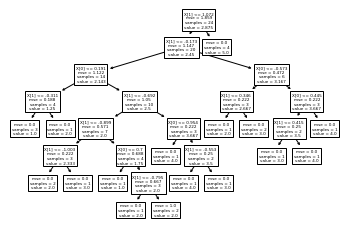

In [78]:
from sklearn import tree

# dtr = DecisionTreeRegressor(max_depth=2,min_samples_leaf=3,min_samples_split=8)
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

tree.plot_tree(dtr)

print(np.sqrt(mean_squared_error(y_test,dtr.predict(X_test))))

In [79]:
from sklearn.metrics import mean_squared_error
import numpy as np

print("Multiple Linear Regression")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,lr.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,lr.predict(X_test))))
print("Testing R-squared",lr.score(X_test,y_test))
print()
print("Ridge Regression")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,rdg.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,rdg.predict(X_test))))
print("Testing R-squared",rdg.score(X_test,y_test))
print()
print("Ridge Regression CV")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,rdg_cv.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,rdg_cv.predict(X_test))))
print("Testing R-squared",rdg_cv.score(X_test,y_test))
print()
print("Lasso Regression")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,lss.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,lss.predict(X_test))))
print("Testing R-squared",lss.score(X_test,y_test))
print()
print("Lasso Regression CV")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,lss_cv.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,lss_cv.predict(X_test))))
print("Testing R-squared",lss_cv.score(X_test,y_test))
print()
print("Elasticnet Regression")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,eln.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,eln.predict(X_test))))
print("Testing R-squared",eln.score(X_test,y_test))
print()
print("Elasticnet Regression CV")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,eln_cv.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,eln_cv.predict(X_test))))
print("Testing R-squared",eln_cv.score(X_test,y_test))
print()
print("Decision Tree Regression")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,gs.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,gs.predict(X_test))))
print("Testing R-squared",gs.score(X_test,y_test))
print()
print("Support Vector Regression")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,svr.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,svr.predict(X_test))))
print("Testing R-squared",svr.score(X_test,y_test))

Multiple Linear Regression
Training RMSE 0.6910475306671169
Testing RMSE 0.7343860786956624
Testing R-squared 0.7546689006675902

Ridge Regression
Training RMSE 0.6994395453078222
Testing RMSE 0.7805636599248249
Testing R-squared 0.7228464853735949

Ridge Regression CV
Training RMSE 0.6911505612006701
Testing RMSE 0.7387350317842284
Testing R-squared 0.7517546499646067

Lasso Regression
Training RMSE 1.3635890143294642
Testing RMSE 1.5351006777762464
Testing R-squared -0.07195723684210509

Lasso Regression CV
Training RMSE 0.7313914489402078
Testing RMSE 0.8585806096531868
Testing R-squared 0.6646750366317105

Elasticnet Regression
Training RMSE 1.1571759991910202
Testing RMSE 1.3754058779438234
Testing R-squared 0.13947104955273404

Elasticnet Regression CV
Training RMSE 0.691746703158768
Testing RMSE 0.7461530139509933
Testing R-squared 0.7467441250089989

Decision Tree Regression
Training RMSE 0.4859126579037751
Testing RMSE 1.044465935734187
Testing R-squared 0.5037593984962405

Su